# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

from pprint import pprint

import json



### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

units = 'metric'

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | rongelap
Processing Record 4 of Set 1 | ketchikan
Processing Record 5 of Set 1 | tofol
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | caxito
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | jumla
Processing Record 17 of Set 1 | vallenar
Processing Record 18 of Set 1 | faya-largeau
Processing Record 19 of Set 1 | santo augusto
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | ambon
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Se

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,7.54,83,79,15.20,TF,1712604951
1,adamstown,-25.0660,-130.1015,23.78,84,73,2.62,PN,1712604848
2,rongelap,11.1635,166.8941,26.94,80,99,9.69,MH,1712604882
3,ketchikan,55.3422,-131.6461,6.26,87,100,7.20,US,1712604951
4,tofol,5.3248,163.0078,25.81,84,100,8.66,FM,1712604843


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.54,83,79,15.20,TF,1712604951
1,adamstown,-25.0660,-130.1015,23.78,84,73,2.62,PN,1712604848
2,rongelap,11.1635,166.8941,26.94,80,99,9.69,MH,1712604882
3,ketchikan,55.3422,-131.6461,6.26,87,100,7.20,US,1712604951
4,tofol,5.3248,163.0078,25.81,84,100,8.66,FM,1712604843


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

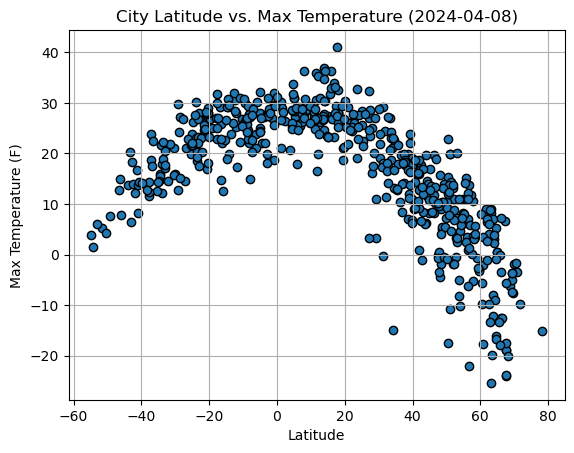

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-04-08)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

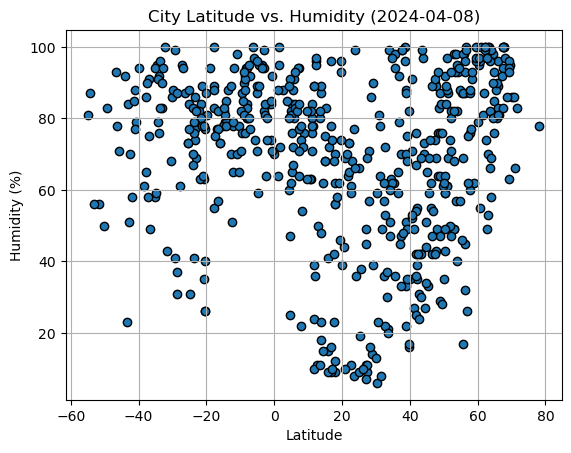

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-08)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

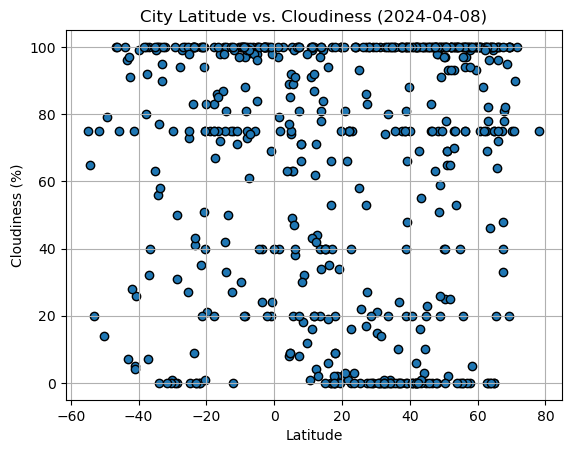

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-08)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

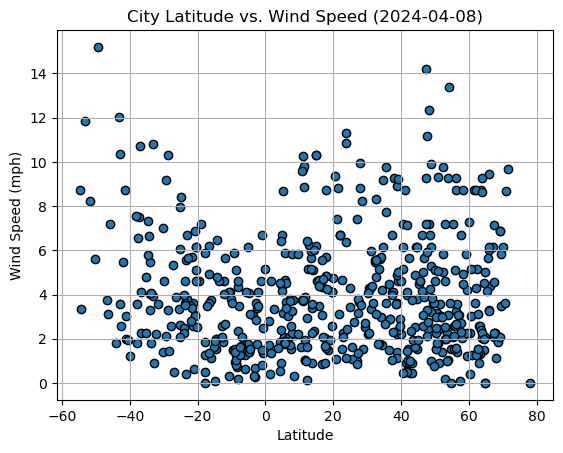

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-08)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values, hemisphere, x_label, y_label):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    plt.scatter(x_values, y_values, marker="o", edgecolors="black")

    plt.plot(x_values, regress_values, "r-", label="y=" + str(round(slope, 2)) + "x +" + str(round(intercept, 2)))

    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.grid(True)

    print("The r value is: " + str(line_eq))
    
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rongelap,11.1635,166.8941,26.94,80,99,9.69,MH,1712604882
3,ketchikan,55.3422,-131.6461,6.26,87,100,7.20,US,1712604951
4,tofol,5.3248,163.0078,25.81,84,100,8.66,FM,1712604843
5,isafjordur,66.0755,-23.1240,-3.54,89,96,9.46,IS,1712604867
11,thompson,55.7435,-97.8558,15.09,17,20,2.57,CA,1712604759


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.54,83,79,15.20,TF,1712604951
1,adamstown,-25.0660,-130.1015,23.78,84,73,2.62,PN,1712604848
6,uturoa,-16.7333,-151.4333,29.19,77,86,6.18,PF,1712604886
7,grytviken,-54.2811,-36.5092,1.59,87,65,3.33,GS,1712604847
8,waitangi,-43.9535,-176.5597,13.79,92,100,1.79,NZ,1712604951


###  Temperature vs. Latitude Linear Regression Plot

The r value is: y = -0.58x + 35.67


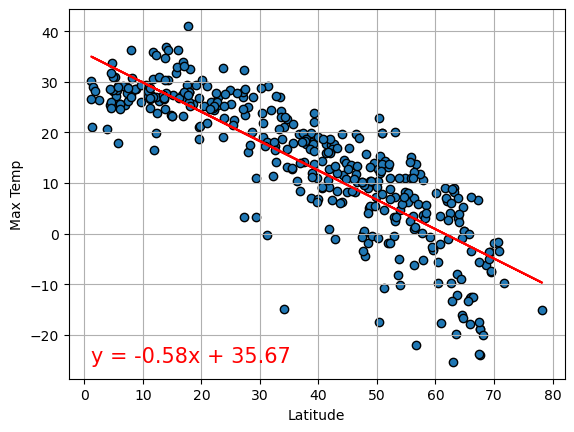

In [22]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern", "Latitude", "Max Temp")


The r value is: y = 0.36x + 29.62


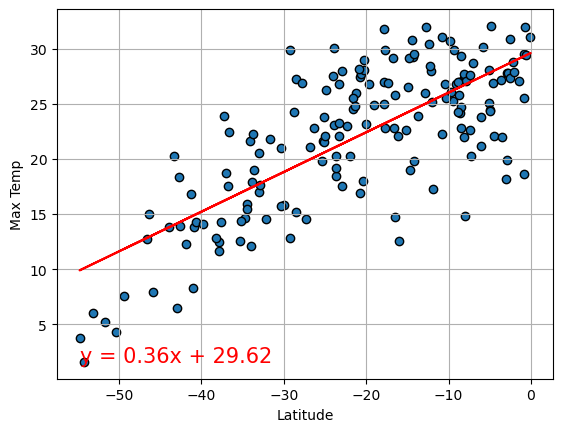

In [23]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Northern", "Latitude", "Max Temp")

**Discussion about the linear relationship:** These plots show that there is definitely a correlation between Latitude and Max temp, but it goes in opposite directions depending on the Hemisphere. For the northern Hemisphere, the max temperature decreases the higher the latitude is. For the southern hemisphere, the max temperate increases the higher the latitude is. 

### Humidity vs. Latitude Linear Regression Plot

The r value is: y = 0.33x + 53.27


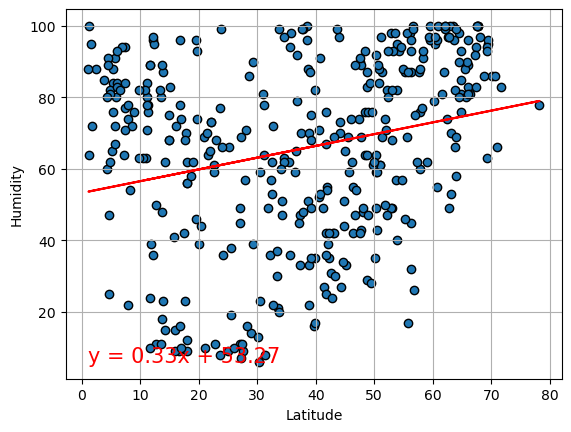

In [24]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern", "Latitude", "Humidity")

The r value is: y = 0.26x + 82.69


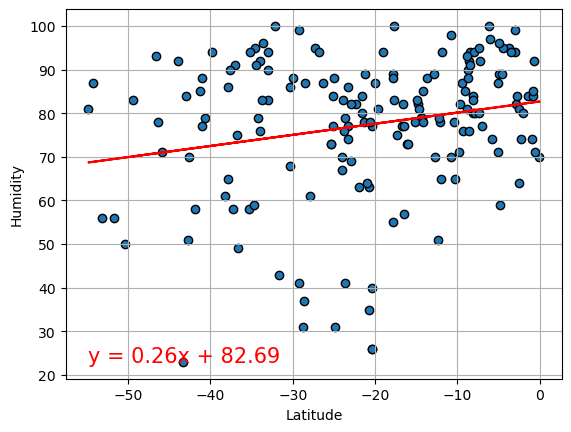

In [25]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Northern", "Latitude", "Humidity")

**Discussion about the linear relationship:** There does not seem to be a lot of correlation between Latitude and humidity for either hemisphere. There is a slight correlation for northern, but the data is all over the place in relation to the regression line. The regression line for southern is relatively flat. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: y = 0.39x + 46.18


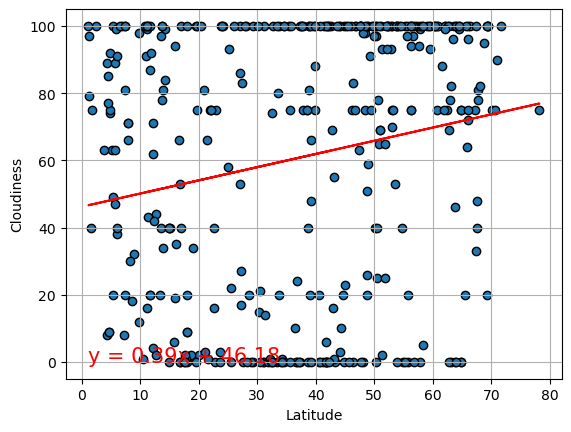

In [26]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern", "Latitude", "Cloudiness")

The r value is: y = 0.42x + 79.16


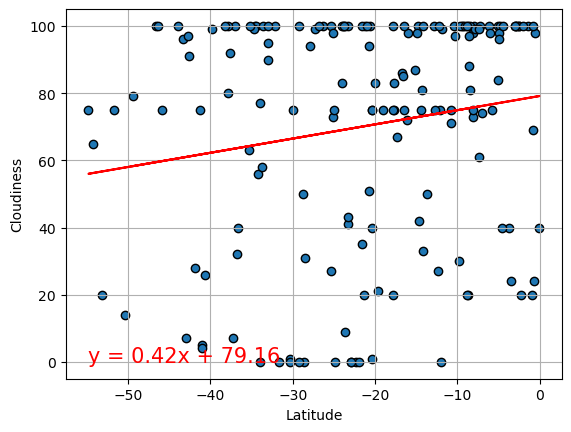

In [27]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Northern", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Both hemispheres have an increasing correlation of an increase in cloudiness as the latitude increases. But on both the data points are very wide spread above and below the regression line.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: y = 0.0x + 3.99


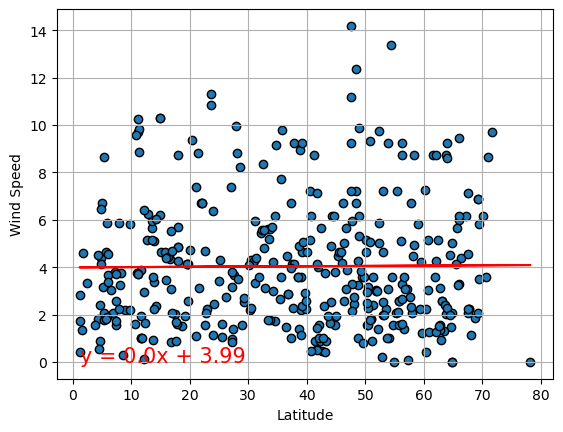

In [28]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern", "Latitude", "Wind Speed")

The r value is: y = -0.09x + 1.93


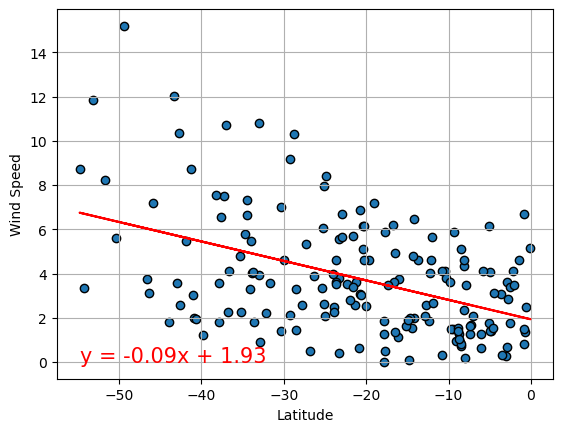

In [29]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Northern", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** Wind speed for the north is relatively flat compared to latitude. For the south, there is a slight decrease in wind speed compared to latitude. 